In [89]:
pip install pykan torch onnx keras onnx2keras h5py


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import torch
import onnx
from onnx2keras import onnx_to_keras
from keras.models import load_model
from kan import KAN


In [76]:
# Load dataset
df = pd.read_csv('../data/period_dataset.csv')
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   148239.5  2294 non-null   float64
 1   1         2294 non-null   float64
 2   0.2       2294 non-null   float64
 3   149211    2294 non-null   int64  
 4   1.1       2294 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 89.7 KB


In [77]:
# Split dataset into features and labels
X = df.values[:, 0:4]
y = df.values[:, 4]

In [78]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [79]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=14)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [80]:
# Scale features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Prepare data for KAN model
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train).float()
dataset['test_input'] = torch.from_numpy(X_test).float()
dataset['train_label'] = torch.from_numpy(y_train).long()
dataset['test_label'] = torch.from_numpy(y_test).long()

In [90]:
# Define KAN model
model = KAN(width=[4, 2], grid=10, k=5)  # Adjust width according to the number of features

# Define training and testing accuracy functions
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

# Training parameters
optimizer = torch.optim.LBFGS(model.parameters())
loss_fn = torch.nn.CrossEntropyLoss()


checkpoint directory created: ./model
saving model version 0.0


In [91]:
# Training loop
steps = 20
for step in range(steps):
    def closure():
        optimizer.zero_grad()
        train_output = model(dataset['train_input'])
        train_loss = loss_fn(train_output, dataset['train_label'])
        train_loss.backward()
        return train_loss

    optimizer.step(closure)

    if step % 1 == 0:
        train_loss = closure().item()
        test_output = model(dataset['test_input'])
        test_loss = loss_fn(test_output, dataset['test_label']).item()
        print(f"Step {step}/{steps}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Acc: {train_acc():.4f}, Test Acc: {test_acc():.4f}")

Step 0/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 1/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 2/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 3/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 4/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 5/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 6/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 7/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 8/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 9/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 10/20, Train Loss: 0.0000, Test Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000
Step 11/20, Train Loss: 0.0000, Test Loss: 0.0000, Tr

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x293a04310>


=========classification report========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       157

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230

=========confusion matrix========
[[ 73   0]
 [  0 157]]


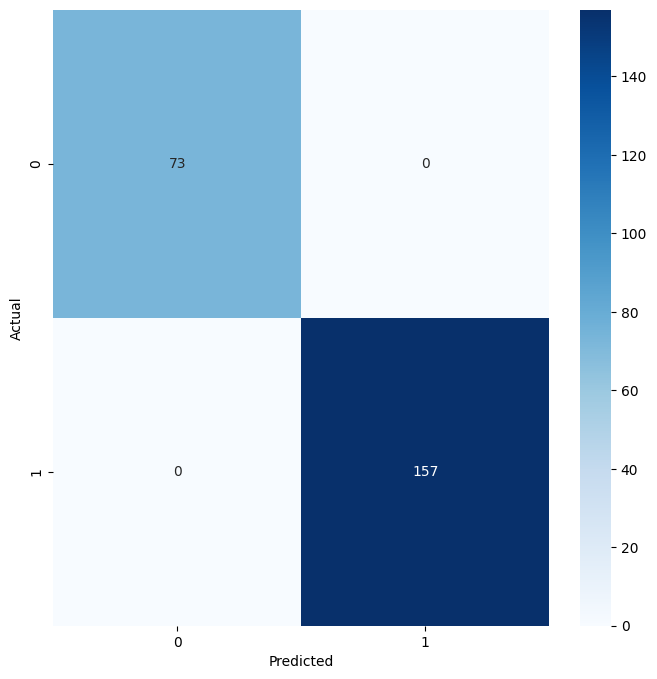

/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/kan/MultKAN.py:369: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  assert x.shape[1] == self.width_in[0]
/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/kan/Symbolic_KANLayer.py:111: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if singularity_avoiding:
/Users/dasha/Downloads/Darya DDOA paper simulation/myenv/lib/python3.11/site-packages/torch/onnx/symbolic_opset9.py:2056: FutureWarning: 'torch.onnx.symbolic_opset9._cast_Bool' is d

Model has been exported to ONNX format.


In [104]:
# Evaluate model on test set
y_pred = np.argmax(model.forward(dataset['test_input']).detach().numpy(), axis=1)
y_true = dataset['test_label'].detach().numpy()

print("=========classification report========")
print(classification_report(y_true, y_pred))

print("=========confusion matrix========")
print(confusion_matrix(y_true, y_pred))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues", fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Convert PyTorch model to ONNX
dummy_input = torch.from_numpy(X_test).float()
onnx_path = "period_model_kan.onnx"
torch.onnx.export(model, dummy_input, onnx_path, input_names=['input'], output_names=['output'])

print("Model has been exported to ONNX format.")